# Visibility calculator for the Great Basin Observatory (GBO)
### Outputs azimuth, altitude, and airmass of an object wrt GBO at midnight<br>Plots azimuth and airmass of the object over the course of the night
written in python 2<br>"Determining and plotting the altitude/azimuth of a celestial object" from astropy documentation<br>based on example of visibility calculator for M33 from Bear Mountain<br>
https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

# ----------only change the following parameters for your source name and midnight of observation----------
### For source:<br>&emsp;Input source name and set sourceIndex = 0<br>&emsp;&emsp;&emsp;OR<br>&emsp;Input source coordinates in ICRS coordinates (rightAsc, declination) and set sourceIndex = 1

In [1]:
sourceIndex = 0

# source name goes here, check source name with SIMBAD database
sourceName = 'V404 cygni'

# source coordinate goes here, default is ICRS coordinates of right ascension and declination
rightAsc = "20 24 03.820" # in units of hour angles
declination = "+33 52 01.90" # in units of degrees

obsTime = '2019-10-22 00:00:00' # should follow this format: 'yyyy-mm-dd 00:00:00'
# keep in mind that midnight is the following day
    # e.g. if the night of observation is October 5th, 2019, then obsTime = '2019-10-06 00:00:00'

# -------------------------------------------------------------------------------------------------------------<br>------------------do not change the following cells--------------------------------------------

In [2]:
# imports for asstropy library and other libraries
%matplotlib notebook
import numpy as np
import datetime
from pytz import timezone
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_icrs_coordinates, get_sun, get_moon
plt.style.use(astropy_mpl_style)

In [3]:
# sets utc offset according to whether GBO is in daylight savings or not
tz = timezone("US/Pacific")
temptime = Time(obsTime)
dt = temptime.to_datetime()
dt = tz.localize(dt)
dt.astimezone(timezone('US/Pacific'))
if dt.timetuple().tm_isdst == 1:
    utcoffset = -7*u.hour
else:
    utcoffset = -8*u.hour

In [4]:
# sets source coordinates either automatically by name or manually by right ascension and declination
if sourceIndex == 0:
    source = SkyCoord.from_name(sourceName)
elif sourceIndex == 1:
    source = SkyCoord(rightAsc, declination, unit=(u.hourangle, u.deg))
else:
    print "sourceIndex variable not specified. Set to 0 if inputting source name. Set to 1 if inputting source coordinates."

In [5]:
# sets midnight of observation based on utc offset and location of observer
midnight = Time(obsTime) - utcoffset # set midnight for date and time of observation
obsLocation = EarthLocation(lat=38.9*u.deg, lon=-114.3*u.deg, height=2080*u.m) # sets location of GBO

In [6]:
# calculates altitude, azimuth, and airmass of source at midnight
sourceAltAz = source.transform_to(AltAz(obstime=midnight,location=obsLocation))
delta_midnight = np.linspace(-8, 8, 1000)*u.hour
frame_night = AltAz(obstime=midnight+delta_midnight, location=obsLocation)
sourceAltAzs_night = source.transform_to(frame_night)
sourceAirMasss_night = sourceAltAzs_night.secz
# gives position of source wrt to horizon for given time
print("Source's Altitude at midnight = {0.alt:.4}".format(sourceAltAz))
print("Source's Azimuth at midnight = {0.az:.4}".format(sourceAltAz))
print("Source's Airmass at midnight = {0.secz:.4}".format(sourceAltAz))

Source's Altitude at midnight = 31.24 deg
Source's Azimuth at midnight = 290.5 deg
Source's Airmass at midnight = 1.928


<IPython.core.display.Javascript object>


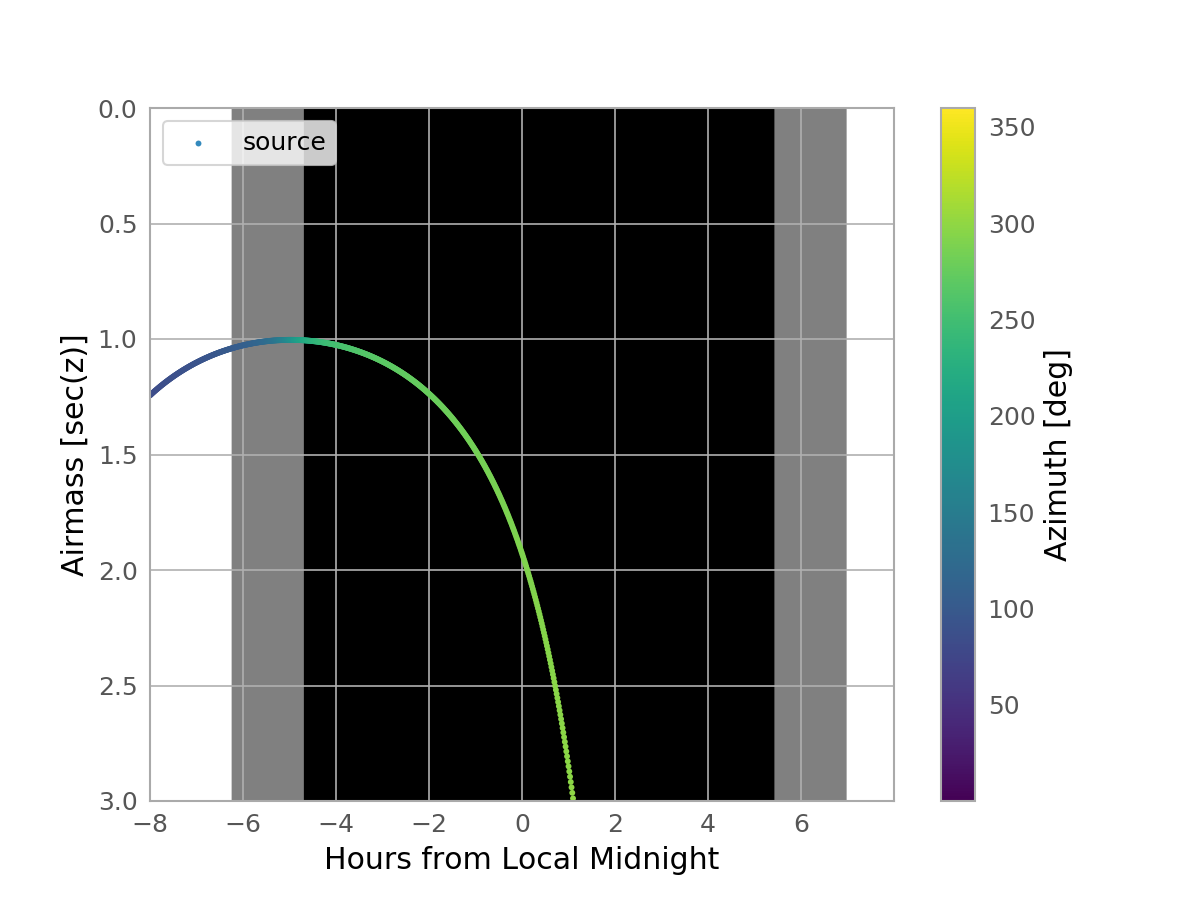

In [7]:
# plots source's airmass over the course of the night
times_night_to_morning = midnight + delta_midnight
frame_night_to_morning = AltAz(obstime=times_night_to_morning, location=obsLocation)

sunAltAzs_night_to_morning = get_sun(times_night_to_morning).transform_to(frame_night_to_morning)
moonAltAzs_night_to_morning = get_moon(times_night_to_morning).transform_to(frame_night_to_morning)
sourceAltAzs_night_to_morning = source.transform_to(frame_night_to_morning)

plt.scatter(delta_midnight, sourceAirMasss_night, c=sourceAltAzs_night_to_morning.az, label='source', 
            lw=0, s=8, cmap='viridis')
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunAltAzs_night_to_morning.alt < -0*u.deg, 
            color='0.5', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90, sunAltAzs_night_to_morning.alt < -18*u.deg,
            color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-8, 8)
plt.xticks(np.arange(8)*2 -8)
plt.ylim(3, 0)
plt.xlabel('Hours from Local Midnight')
plt.ylabel('Airmass [sec(z)]')
plt.show()